In [28]:
import pandas as pd
import os
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline  

In [468]:
source_dir = '/nas/volume1/behavior/data/mworks-data/head_fixed'
experiment = 'LED'
data_dir = os.path.join(source_dir, experiment)
animals = os.listdir(data_dir)
print animals
A = dict((animal, dict()) for animal in animals)

['Minerva', 'Juno', 'Athena', 'Hera']


In [516]:
current_animal = animals[1]
print "Current animal: ", current_animal
current_animal_dir =os.path.join(data_dir, current_animal)
runs = os.listdir(current_animal_dir)
print "Found %i run(s)." % len(runs)
data = dict((i, dict()) for i in range(len(runs)))

Current animal:  Juno
Found 1 run(s).


In [517]:
current_run = 0
df = pd.read_table(os.path.join(current_animal_dir, runs[current_run]), sep='\t ')

/home/juliana/anaconda/envs/behavior/lib/python2.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [518]:
variables = df.columns.values
print "Variable names: ", variables

Variable names:  ['currtime' 'trialnum' 'lefttrial' 'tstart' 'sensorvalue1' 'tsensorvalue1'
 'sensorvalue2' 'tsensorvalue2' 'rewardport1' 'rewardport2' 'treward'
 'correctresponse' 'correctport' 'tend' 'auto_reward' 'allow_retry']


In [519]:
tstamps = df.loc[:, 'currtime']
nans = [i for i,t in enumerate(tstamps) if math.isnan(t) or t==0]
tstamps = [t for i,t in enumerate(tstamps) if i not in nans]
print "Found %i time stamps for data. First tstamp is %i. Removed %i nans." % (len(tstamps), tstamps[0], len(nans))
tstamps[0]

# Remove NaN rows if any:
if len(nans)>0:
    df = df.drop(nans)
    print "Removed data with NaN t-stamp."

Found 3604 time stamps for data. First tstamp is 2449636. Removed 1 nans.
Removed data with NaN t-stamp.


In [520]:
df

currtime  trialnum  lefttrial      tstart  sensorvalue1  \
1        2449636         1          0     1951460          1023   
2        2949252         1          0     1951460          1023   
3        3449868         1          0     1951460          1023   
4        3949636         1          0     1951460          1023   
5        4449364         1          0     1951460          1023   
6        4950096         1          0     1951460             0   
7        5450800         1          0     1951460             0   
8        5950708         2          0     5894600             0   
9        6450324         2          0     5894600          1023   
10       6951108         2          0     5894600          1023   
11       7450660         2          0     5894600          1023   
12       7950452         2          0     5894600          1023   
13       8450176         2          0     5894600             0   
14       8950896         2          0     5894600             0   
15       9450676         3          1     9264744             0   
16       9950340         3          1     9264744          1023   
17      10451140         3          1     9264744          1023   
18      10950820         3          1     9264744          1023   
19      11450500         3          1     9264744          1023   
20      11950180         3          1     9264744          1023   
21      12450980         3          1     9264744          1023   
22      12950724         3          1     9264744          1023   
23      13450468         3          1     9264744          1023   
24      13951140         3          1     9264744          1023   
25      14450756         3          1     9264744          1023   
26      14950644         3          1     9264744          1023   
27      15450260         3          1     9264744          1023   
28      15950948         3          1     9264744          1023   
29      16450828         3          1     9264744          1023   
30      16950436         3          1     9264744          1023   
...          ...       ...        ...         ...           ...   
3575  1789452556       234          1  1783034288             0   
3576  1789952208       234          1  1783034288             0   
3577  1790452916       235          0  1790034796             0   
3578  1790952468       235          0  1790034796             0   
3579  1791452212       235          0  1790034796             0   
3580  1791952972       235          0  1790034796             0   
3581  1792452796       235          0  1790034796             0   
3582  1792952348       235          0  1790034796             0   
3583  1793452084       235          0  1790034796             0   
3584  1793952820       235          0  1790034796             0   
3585  1794452620       235          0  1790034796             0   
3586  1794952420       235          0  1790034796             0   
3587  1795453156       235          0  1790034796             0   
3588  1795952660       235          0  1790034796             0   
3589  1796452528       235          0  1790034796             0   
3590  1796952192       235          0  1790034796             0   
3591  1797452812       236          0  1797035308             0   
3592  1797952628       236          0  1797035308             0   
3593  1798452436       236          0  1797035308             0   
3594  1798953172       236          0  1797035308             0   
3595  1799452684       236          0  1797035308             0   
3596  1799952484       236          0  1797035308             0   
3597  1800452300       236          0  1797035308             0   
3598  1800953036       236          0  1797035308             0   
3599  1801452556       236          0  1797035308             0   
3600  1801952348       236          0  1797035308             0   
3601  1802453100       236          0  1797035308             0   
3602  1802952900       236          0  1797035308      

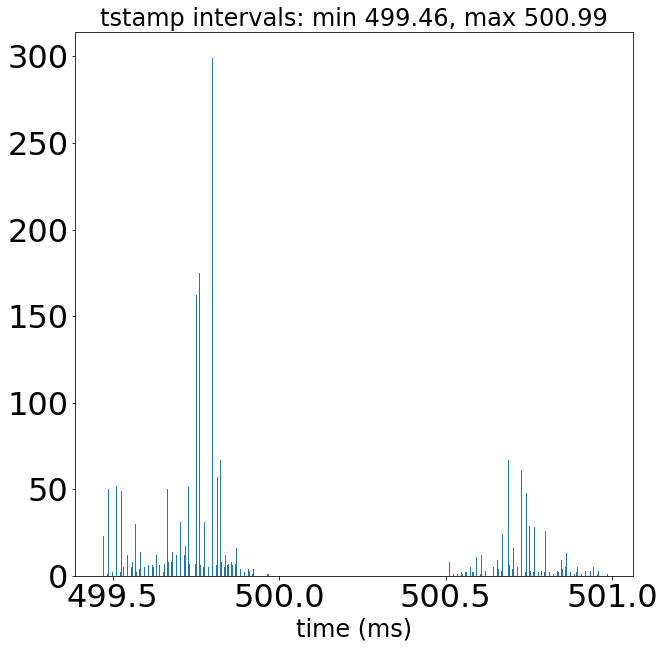

In [521]:
# Look at data grab intervals.
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
data_intervals = np.diff(tstamps)/1000.
ax.hist(data_intervals, bins=1000)
title = "tstamp intervals: min {:04.2f}, max {:04.2f}".format(min(data_intervals), max(data_intervals))
ax.set_title(title, fontsize=24)
ax.set_xlabel('time (ms)', fontsize=24)

In [522]:
print min(data_intervals)
print max(data_intervals)
title = "tstamp intervals: min {:04.2f}, max {:04.2f}".format(min(data_intervals), max(data_intervals))
title

499.464
500.988


'tstamp intervals: min 499.46, max 500.99'

In [523]:
# Parse trials by trialnum:
df.columns.values
trialnums = df.loc[:, 'trialnum']
trials, trial_idxs = np.unique(trialnums, return_index=True)
print "Found trials %i through %i." % (trials[0], trials[-1])

Found trials 1 through 236.


### Trial Indexing.

#### "trial_idxs" go from 0-->nrows. "trials" go from 1-->ntrials.  DF is indexed by "row" value, i.e., 1,2,3,4...nrows.

To index df rows using "trials" as indices into "trial_idxs":   
1. Subtract 1 from "trials" value (i.e., to index the 1st index of "trial_idx", we need to use index=0, but "trials" starts at 1.   
2.  Add 1 to get the proper "row" value for DF, since "trial_idxs" are indices of DF, not DF's row values.

In [524]:
# Get trial numbers for "left" trials:
left_trial_idxs = [t for t in trials if df.loc[trial_idxs[t-1]+1, 'lefttrial']==1]
print "first 10 left idxs: ", left_trial_idxs[0:10]

# Get trial numbers for "right" trials:
right_trial_idxs = [t for t in trials if df.loc[trial_idxs[t-1]+1, 'lefttrial']==0]
right_trial_idxs[0:10]
print "first 10 right idxs: ", right_trial_idxs[0:10]

nleft = len(left_trial_idxs)
nright = len(right_trial_idxs)
ntrials = len(trials)
print "N left (%i) + N right (%i) = %i trials total." % (nleft, nright, ntrials)

first 10 left idxs:  [3, 5, 6, 7, 9, 11, 13, 14, 16, 19]
first 10 right idxs:  [1, 2, 4, 8, 10, 12, 15, 17, 18, 22]
N left (110) + N right (126) = 236 trials total.


In [525]:
# Get percent correct overall:
correct_trial_idxs = []
correct_left_trials = []
correct_right_trials = []
for tstart in trials:
    if tstart==trials[-1]:
        correct_trial = np.any(df.loc[trial_idxs[tstart-1]+1:, 'correctresponse'])
    else:
        correct_trial = np.any(df.loc[trial_idxs[tstart-1]+1:trial_idxs[tstart], 'correctresponse'])
    if correct_trial:
        correct_trial_idxs.append(tstart)

        # Also, sort out left vs. right trials:
        if df.loc[trial_idxs[tstart-1]+1, 'lefttrial']==1:
            correct_left_trials.append(tstart)
        else:
            correct_right_trials.append(tstart)
        
overall_correct_percent = float(len(correct_trial_idxs))/float(ntrials)
print "Over percent correct: ", overall_correct_percent
print "Correct LEFT trials: {0:.2f}%".format(float(len(correct_left_trials))/float(nleft))
print "Correct RIGHT trials: {0:.2f}%".format(float(len(correct_right_trials))/float(nright))

Over percent correct:  0.152542372881
Correct LEFT trials: 0.20%
Correct RIGHT trials: 0.11%


In [526]:
# Check licks:
threshold = 1000
licksensor1 = df.loc[:, 'sensorvalue1']; licksensor1 = np.array([l for l in licksensor1 if not math.isnan(l)])
licksensor2 = df.loc[:, 'sensorvalue2']; licksensor2 = np.array([l for l in licksensor2 if not math.isnan(l)])
t_licksensor1 = df.loc[:, 'tsensorvalue1']; t_licksensor1 = np.array([l for l in t_licksensor1 if not math.isnan(l)])
t_licksensor2 = df.loc[:, 'tsensorvalue2']; t_licksensor2 = np.array([l for l in t_licksensor2 if not math.isnan(l)])

# Put time relative to start of session:
t_licksensor1 = (t_licksensor1 - tstamps[0]) / 1E6
t_licksensor2 = (t_licksensor2 - tstamps[0]) / 1E6
                 
# Find indices of licking events:
left_licks = np.array([i for i,val in enumerate(licksensor1) if val>=threshold])
right_licks = np.array([i for i,val in enumerate(licksensor2) if val>=threshold])

[]

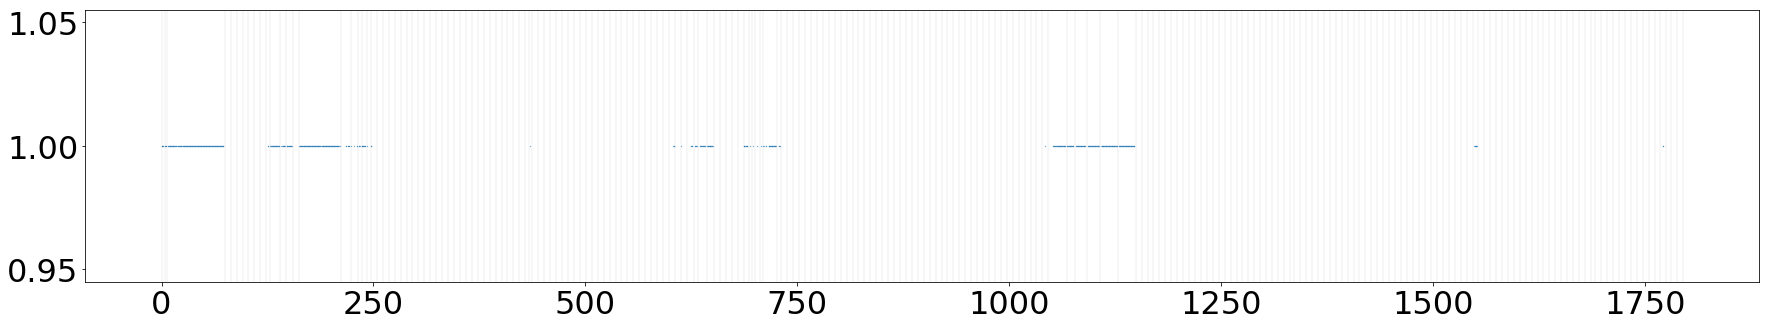

In [527]:
# PLOT:

tstamps = np.array(tstamps)
trial_start_times = (tstamps[np.array([i for i in trial_idxs])] - tstamps[0]) / 1E6

correct_left_licks = [trial_idxs[t-1]+1 for t in correct_left_trials]

# Plot licks
plt.figure(figsize=(30,5))
plt.plot(t_licksensor1[left_licks], np.ones(len(left_licks)), '.', markersize=0.5)
for tstart in trial_start_times:
    plt.axvline(x=tstart, color='k', linestyle='-', alpha=0.6, linewidth=0.1)

plt.plot()

In [528]:
trialdict = dict()
for t in trials:
    trialdict[t] = dict()
    trialdict[t]['start'] = tstamps[trial_idxs[t-1]]
    if t==trials[-1]:
        trialdict[t]['end'] = tstamps[-1]
    else:
        trialdict[t]['end'] = tstamps[trial_idxs[t]-1]
        
    curr_trialidxs = [i for i in list(df.index) if df.loc[i, 'currtime']>=trialdict[t]['start'] and df.loc[i, 'currtime']<=trialdict[t]['end']]
    trialdict[t]['data_idxs'] = curr_trialidxs
    trialdict[t]['lickport1'] = [df.loc[i, 'sensorvalue1'] for i in curr_trialidxs]
    trialdict[t]['lickport2'] = [df.loc[i, 'sensorvalue2'] for i in curr_trialidxs]
    trialdict[t]['t_lickport1'] = [df.loc[i, 'tsensorvalue1'] for i in curr_trialidxs]
    trialdict[t]['t_lickport2'] = [df.loc[i, 'tsensorvalue2'] for i in curr_trialidxs]

    trialdict[t]['leftside'] = df.loc[trial_idxs[t-1]+1, 'lefttrial']
    if t in correct_trial_idxs:
        trialdict[t]['correct'] = 1
    else:
        trialdict[t]['correct'] = 0

In [529]:
# Save all session info in animals dict:
import cPickle as pkl
data[current_run]['animal'] = current_animal
data[current_run]['session'] = runs[current_run]
data[current_run]['ntrials'] = ntrials
data[current_run]['nleft'] = nleft
data[current_run]['nright'] = nright
data[current_run]['ncorrect'] = len(correct_trial_idxs)
data[current_run]['ncorrect_left'] = len(correct_left_trials)
data[current_run]['ncorrect_right'] = len(correct_right_trials)
data[current_run]['trials'] = trialdict

output_dir = os.path.join(current_animal_dir, 'output')
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    
animal_fn = os.path.join(output_dir, '%s_sessiondata.pkl' % current_animal)
with open(animal_fn, 'wb') as f:
    pkl.dump(data, f)

A[current_animal] = data

In [530]:
A.keys()

['Minerva', 'Hera', 'Juno', 'Athena']

In [538]:
performance = dict((a, dict()) for a in A.keys())
for a in A.keys():
    performance[a]['correct'] = float(A[a][current_run]['ncorrect'])/float(A[a][current_run]['ntrials'])
    performance[a]['ntrials'] = float(A[a][current_run]['ntrials'])

for a in A.keys():
    print a, performance[a]


Minerva {'ntrials': 424.0, 'correct': 0.6957547169811321}
Hera {'ntrials': 181.0, 'correct': 0.3259668508287293}
Juno {'ntrials': 236.0, 'correct': 0.15254237288135594}
Athena {'ntrials': 468.0, 'correct': 0.6089743589743589}


In [441]:
trial_durs = [trialdict[t]['end'] - trialdict[t]['start'] for t in trialdict.keys()]
longest_trial = trial_durs.index(max(trial_durs))
max_datapoints = len(trialdict[longest_trial+1]['data_idxs'])

In [442]:
# import matplotlib.pylab as pylab
# params = {
#          'axes.labelsize': 48,
#          'axes.titlesize': 48,
#          'xtick.labelsize': 32,
#          'ytick.labelsize': 32}
# pylab.rcParams.update(params)

import  matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['text.usetex'] = False
#mpl.rcParams['text.latex.preamble'] = [r"\usepackage[charter]{mathdesign}"]
mpl.rcParams['font.family'] = ['sans']
#mpl.rcParams['font.size'] = 10

#nb_procs   = np.array([1,     2,        4,      12,     24,    48,     96,     192,    384])

def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points
            spine.set_smart_bounds(True)
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])

# -- We create the figure.
#figPres = plt.figure(figsize=(3,1.75))
#axPres  = figPres.add_subplot(111)


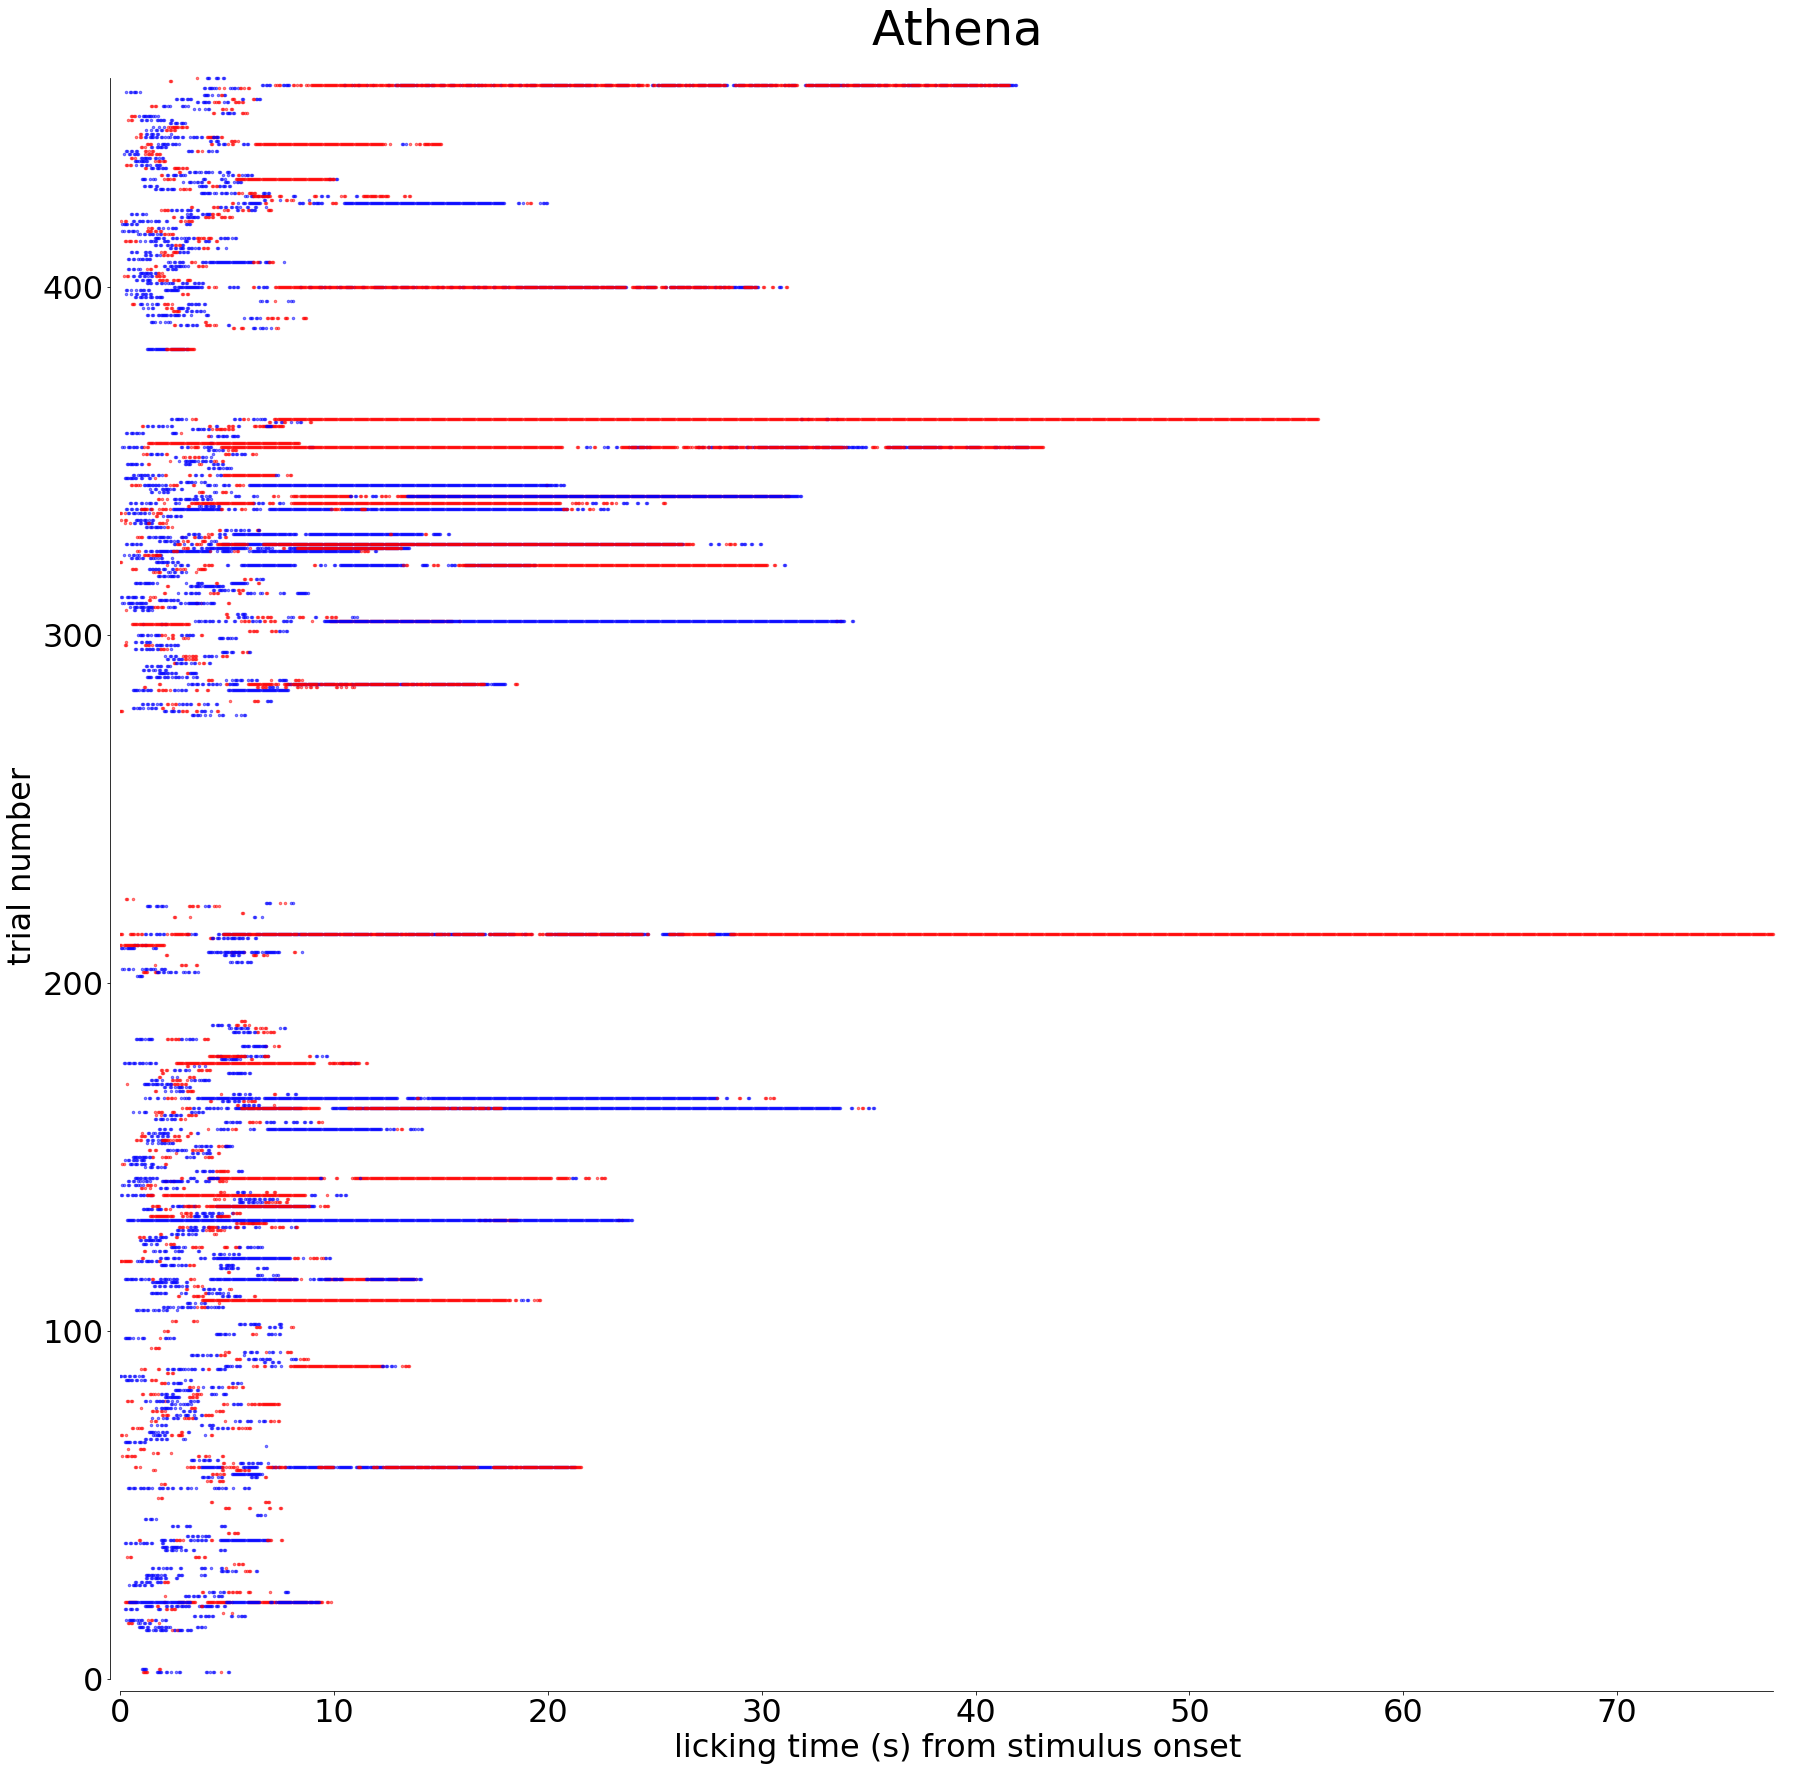

In [444]:
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(1,1,1)

for t in trialdict.keys():
    leftlicking = False; rightlicking = False
    port1 = np.array([int(i) for i,val in enumerate(trialdict[t]['lickport1']) if val>=threshold])
    if len(port1)>0:
        t_port1 = np.array(trialdict[t]['t_lickport1'])[port1]
        leftlicking = True
    
    port2 = np.array([i for i,val in enumerate(trialdict[t]['lickport2']) if val>=threshold])
    if len(port2)>0:
        t_port2 = np.array(trialdict[t]['t_lickport2'])[port2]
        rightlicking = True
        
    if trialdict[t]['leftside']==1:
        left_alpha = 0.5
        right_alpha = 0.5
        left_color = 'b'
        right_color = 'r'
    else:
        left_alpha = 0.5
        right_alpha = 0.5
        left_color = 'r'
        right_color = 'b'
    
    if leftlicking:
        ax.plot((t_port1-trialdict[t]['start'])/1E6, np.ones(len(t_port1))*t, '.', markersize=5, color=left_color, alpha=left_alpha)
    if rightlicking:
        ax.plot((t_port2-trialdict[t]['start'])/1E6, np.ones(len(t_port2))*t, '.', markersize=5, color=right_color, alpha=right_alpha)
    
ax.set_ylim([-0.5, ntrials])
ax.set_xlim([0, (trialdict[longest_trial+1]['end']-trialdict[longest_trial+1]['start'])/1E6])
ax.set_xlabel('licking time (s) from stimulus onset', fontsize=32)
ax.set_ylabel('trial number', fontsize=32)
adjust_spines(ax, ['left', 'bottom'])
ax.set_title('%s' % current_animal)

In [395]:
(trialdict[longest_trial+1]['end']-trialdict[longest_trial+1]['start'])/1E6

67.500152